### **Malaria Detection**

In [1]:
#Import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
#unzip the zile
from zipfile import ZipFile
file_name='/Dataset.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
#Re-size the all images to this
IMAGE_SIZE=[224,224]

train_path='/content/Dataset/Train'
test_path='/content/Dataset/Test'

In [10]:
#Import the vgg19 library as shwn below
#Here we will be using imagnet weigths
vgg19=VGG19(input_shape=IMAGE_SIZE +[3], weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [12]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
#don't train the wxisting weights
for layer in vgg19.layers:
  layer.trainable=False

In [16]:
#Output classes
folder=glob('/content/Dataset/Train/*')

In [17]:
folder

['/content/Dataset/Train/Parasite', '/content/Dataset/Train/Uninfected']

In [18]:
x=Flatten()(vgg19.output)

In [21]:
prediction=Dense(len(folder),activation='softmax')(x)

#create a model object
model=Model(inputs=vgg19.input,outputs=prediction)

In [22]:
#view the structure of model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [23]:
from tensorflow.keras.layers import MaxPooling2D

In [24]:
#Create a model from scratch

### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
#Use the Image data generater to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [28]:
#Make sure that you provide the dame target size as Intilized from the image
training_set=train_datagen.flow_from_directory('/content/Dataset/Train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 416 images belonging to 2 classes.


In [29]:
training_set

In [30]:
test_set=test_datagen.flow_from_directory('/content/Dataset/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 134 images belonging to 2 classes.


In [32]:
#Fit the model
#Run the cell

run=model.fit(training_set,validation_data=test_set,epochs=30,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/30
13/13 [==============================] - 4s 324ms/step - loss: 0.6853 - accuracy: 0.5625 - val_loss: 0.6963 - val_accuracy: 0.4552
Epoch 2/30
13/13 [==============================] - 4s 323ms/step - loss: 0.6745 - accuracy: 0.5769 - val_loss: 0.6803 - val_accuracy: 0.4851
Epoch 3/30
13/13 [==============================] - 4s 317ms/step - loss: 0.6342 - accuracy: 0.6538 - val_loss: 0.7389 - val_accuracy: 0.3284
Epoch 4/30
13/13 [==============================] - 4s 315ms/step - loss: 0.5554 - accuracy: 0.6995 - val_loss: 0.8998 - val_accuracy: 0.3433
Epoch 5/30
13/13 [==============================] - 4s 317ms/step - loss: 0.4939 - accuracy: 0.7356 - val_loss: 0.9884 - val_accuracy: 0.4104
Epoch 6/30
13/13 [==============================] - 4s 317ms/step - loss: 0.4664 - accuracy: 0.7668 - val_loss: 1.0078 - val_accuracy: 0.4104
Epoch 7/30
13/13 [==============================] - 4s 316ms/step - loss: 0.4388 - accuracy: 0.7837 - val_loss: 0.9432 - val_accuracy: 0.3881
Epoch 

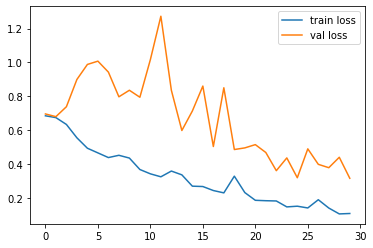

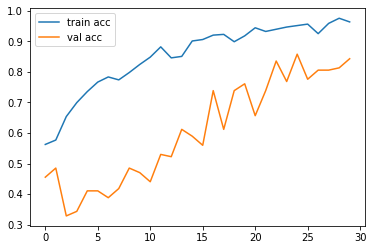

<Figure size 432x288 with 0 Axes>

In [35]:
# plot the loss
plt.plot(run.history['loss'], label='train loss')
plt.plot(run.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(run.history['accuracy'], label='train acc')
plt.plot(run.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
#save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [37]:
y_pred=model.predict(test_set)
y_pred[:9]

array([[0.68637073, 0.3136293 ],
       [0.9880558 , 0.01194414],
       [0.16865395, 0.8313461 ],
       [0.9976318 , 0.00236815],
       [0.5576879 , 0.44231218],
       [0.08991054, 0.9100895 ],
       [0.95723516, 0.04276478],
       [0.9955674 , 0.00443262],
       [0.29020467, 0.7097953 ]], dtype=float32)

In [38]:
import numpy as np
ypred=np.argmax(y_pred,axis=1)

In [39]:
ypred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [40]:
model=load_model('model_vgg19.h5')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [84]:
imag=image.load_img('/content/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_159.png',target_size=(224,224))

In [85]:
images=image.img_to_array(imag)

In [86]:
images

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [77]:
images.shape

(224, 224, 3)

In [78]:
x=images/255

In [79]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [80]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [82]:
if (a==1):
  print('Uninfected')
else:
  print('Infected')

Infected
